  # Analyse  The Song Of Achilles Book 

In [1]:
import pandas as pd
import tweepy
import emoji
import re
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
from PIL import Image
import nltk
import nltk.tokenize 
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
#nltk.download('punkt')
from nltk.corpus import stopwords
stopwords.words('english')
from collections import Counter
%matplotlib inline

In [2]:
%run ./keys.ipynb

## authentication to twitter API 

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
# create lists where we will store twitter data
num_of_tweets = 1000
tweets = []
likes = []
time = []

## retrieving and save tweet

In [ ]:
#create a query to retrieve the tweet related to the book by choosing some parameters (language, date ...)
query = '"The Song of Achilles"'
for i in tweepy.Cursor(api.search, q = query, Since ='2021-01-01', lang = 'en', tweet_mode = "extended").items(num_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count) 
    time.append(i.created_at)

In [ ]:
# put tweets in datafram and save as csv file 
The_Song_of_Achilles_raw = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})
The_Song_of_Achilles_raw.to_csv('The_Song_of_Achilles_raw.csv', header = True, index = False, index_label = None, encoding = "UTF8")

In [66]:
# I use read csv to be able to work locally
The_Song_of_Achilles_raw = pd.read_csv(r'The_Song_of_Achilles_raw.csv', encoding = "UTF8") 

## cleaning the tweets 

In [67]:
# clean RT and reset indexing 
The_Song_of_Achilles_cleaning = The_Song_of_Achilles_raw[~The_Song_of_Achilles_raw.tweets.str.contains("RT")]
The_Song_of_Achilles_cleaning = The_Song_of_Achilles_cleaning.reset_index(drop = True)

In [68]:
The_Song_of_Achilles_cleaning["tweets"] = The_Song_of_Achilles_cleaning["tweets"].str.replace("\n", " ")  

In [69]:
# cleaning https hashtag usertag emoji symbole 
for i in range(len(The_Song_of_Achilles_cleaning['tweets'])):
    clean_tweet = re.sub("https://[A-Za-z0-9./]+", "", The_Song_of_Achilles_cleaning['tweets'].values[i]).strip()
    clean_tweet = clean_tweet.lower()
    clean_tweet = re.sub("@[A-Za-z0-9_]+ ", "", clean_tweet) 
    clean_tweet = re.sub("#[A-Za-z0-9_]+ ", "", clean_tweet)
    clean_tweet = emoji.get_emoji_regexp().sub(r'', clean_tweet)
    clean_tweet = re.sub("[)(!,/;&-?\★@.“☀☆”✧⋇⋆#✦ಥ‿ಥ•^%]+","", clean_tweet)
    clean_tweet = clean_tweet.strip()
    The_Song_of_Achilles_cleaning['tweets'].values[i] = clean_tweet

In [70]:
# vérification of cleaning 
The_Song_of_Achilles_cleaning["tweets"].values[0:]

array(['i started the song of achilles this morning and i’m already  pages in',
       'spoilers re the song of achilles anyone who’s read it what did you make of patroclus and deidamia having sex it was the one part of the book i didn’t like and found it aberrational for patroclus it seemed very random and was frustrating to read',
       'im still not over the song of achilles',
       'mum read to me from d’aulaire’s when i was little then i read the song of achilles in high school and then i took latin for kicks in first year from an incredible teacher shoutout to jennifer knapp in college and all i wanted after that was more    workingclassicists',
       'gl for the song of achilles', 'the song of achilles',
       'might share my fav quotesparts from the song of achilles while i weep into my pillow',
       'i ahvent read it i recommend you read the song of achilles',
       'waiting for that dnf the song of achilles au',
       'im only  chapters in to the song of achilles and 

## save Data clean as csv file

In [ ]:
The_Song_of_Achilles_cleaning.to_csv('The_Song_of_Achilles_clean.csv', header = True, index = False, index_label = None, encoding = "UTF8")

## Analyse of tweets and visualization

In [71]:
# transform twittes to text 
tweet_text = str(The_Song_of_Achilles_cleaning['tweets'].values)
tweet_text = tweet_text.replace("\'\n", "")
tweet_text = tweet_text.replace("\'", "")

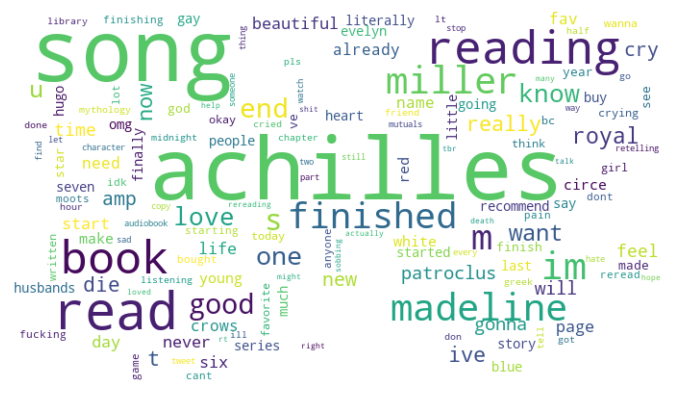

In [72]:
# wordc loud visualization
def plot_word_cloud(tweet_text, masque) :
    mask_coloring = np.array(Image.open(str(masque)))
    wc = WordCloud(width = 600, height = 600, background_color = "white", max_words = 150,
                   mask = mask_coloring, max_font_size = 90,
                   collocations = False, random_state = 42, margin = 2)

    plt.figure(figsize = (12,8))
    wc.generate(tweet_text)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file('Twitter.jpg')

plot_word_cloud(tweet_text, 'E:\\Logos.png')

#### so we have a lot of words that stand out, are related to the book but also words that express a return of the book

In [73]:
# tokenization of the tweets text
token = nltk.word_tokenize(tweet_text)
filtered = [word for word in token if word not in stopwords.words('english')]

In [74]:
# creat a list of bigrams and trigrams that found in the of twittes
bigrams = list(ngrams(filtered,2))
trigrams = list(ngrams(filtered,3))

In [75]:
# count Occurency of bigrams and trigrams words in the list of twittes 
a = Counter(bigrams)
b = Counter(trigrams) 

In [76]:
# transform it to DataFram and keep top 30 of bigrams and trigrams
df_bigram = pd.DataFrame.from_records(a.most_common(30), columns=['bigram','count'])
df_trigram = pd.DataFrame.from_records(b.most_common(30), columns=['trigram','count'])

In [77]:
df_bigram.head()

,bigram,count
0,"(song, achilles)",587
1,"(reading, song)",68
2,"(read, song)",67
3,"(madeline, miller)",60
4,"(achilles, madeline)",49


In [78]:
df_trigram.head()

,trigram,count
0,"(reading, song, achilles)",68
1,"(read, song, achilles)",67
2,"(song, achilles, madeline)",49
3,"(achilles, madeline, miller)",49
4,"(finished, song, achilles)",34


<AxesSubplot:xlabel='count', ylabel='bigram'>

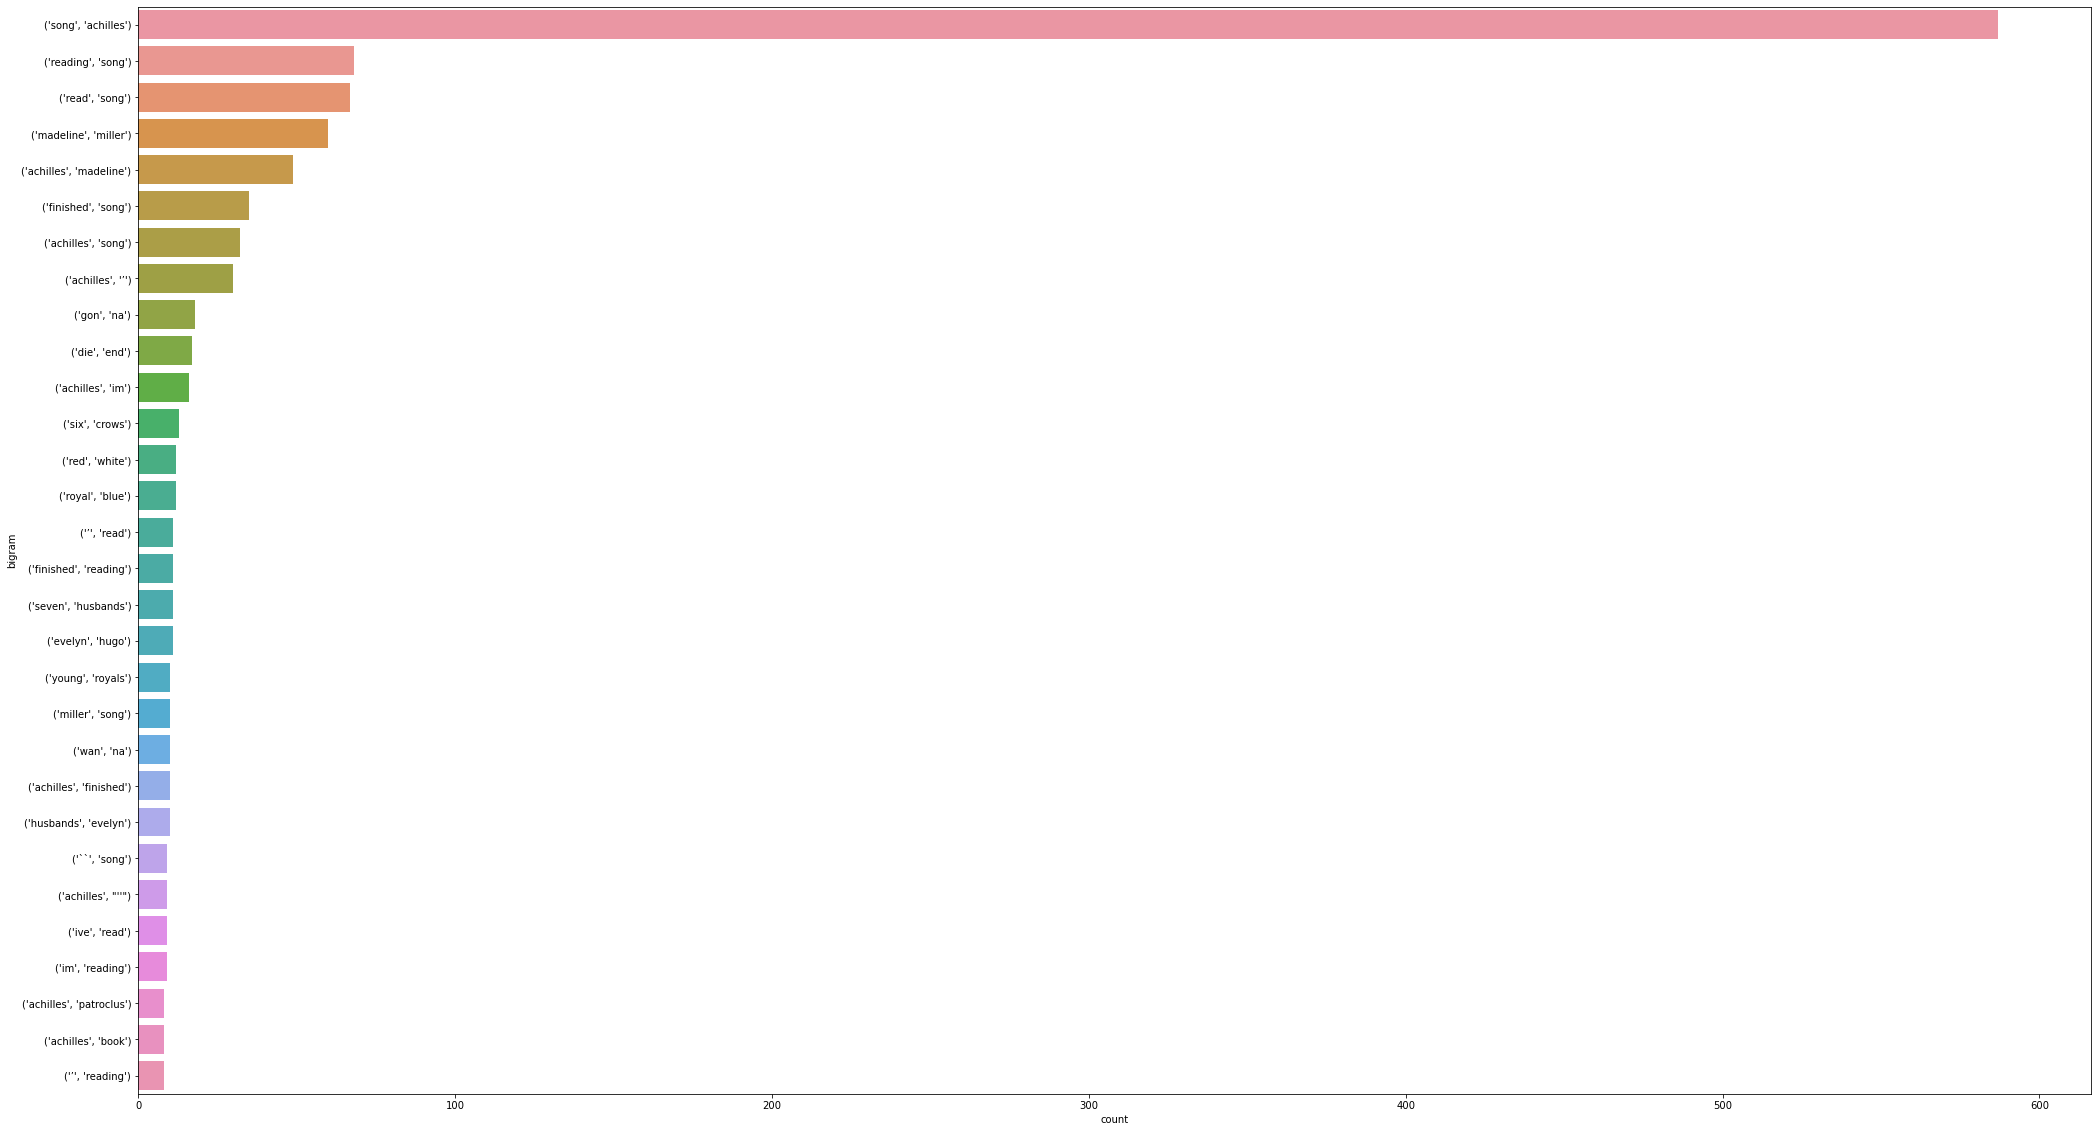

In [79]:
# bigrams visualization 
plt.figure(figsize=(35,20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x=df_bigram['count'], y=df_bigram['bigram'])

###### we find many associations of words related to the title, the author or the characters of the book, or the words "read" "reading"

<AxesSubplot:xlabel='count', ylabel='trigram'>

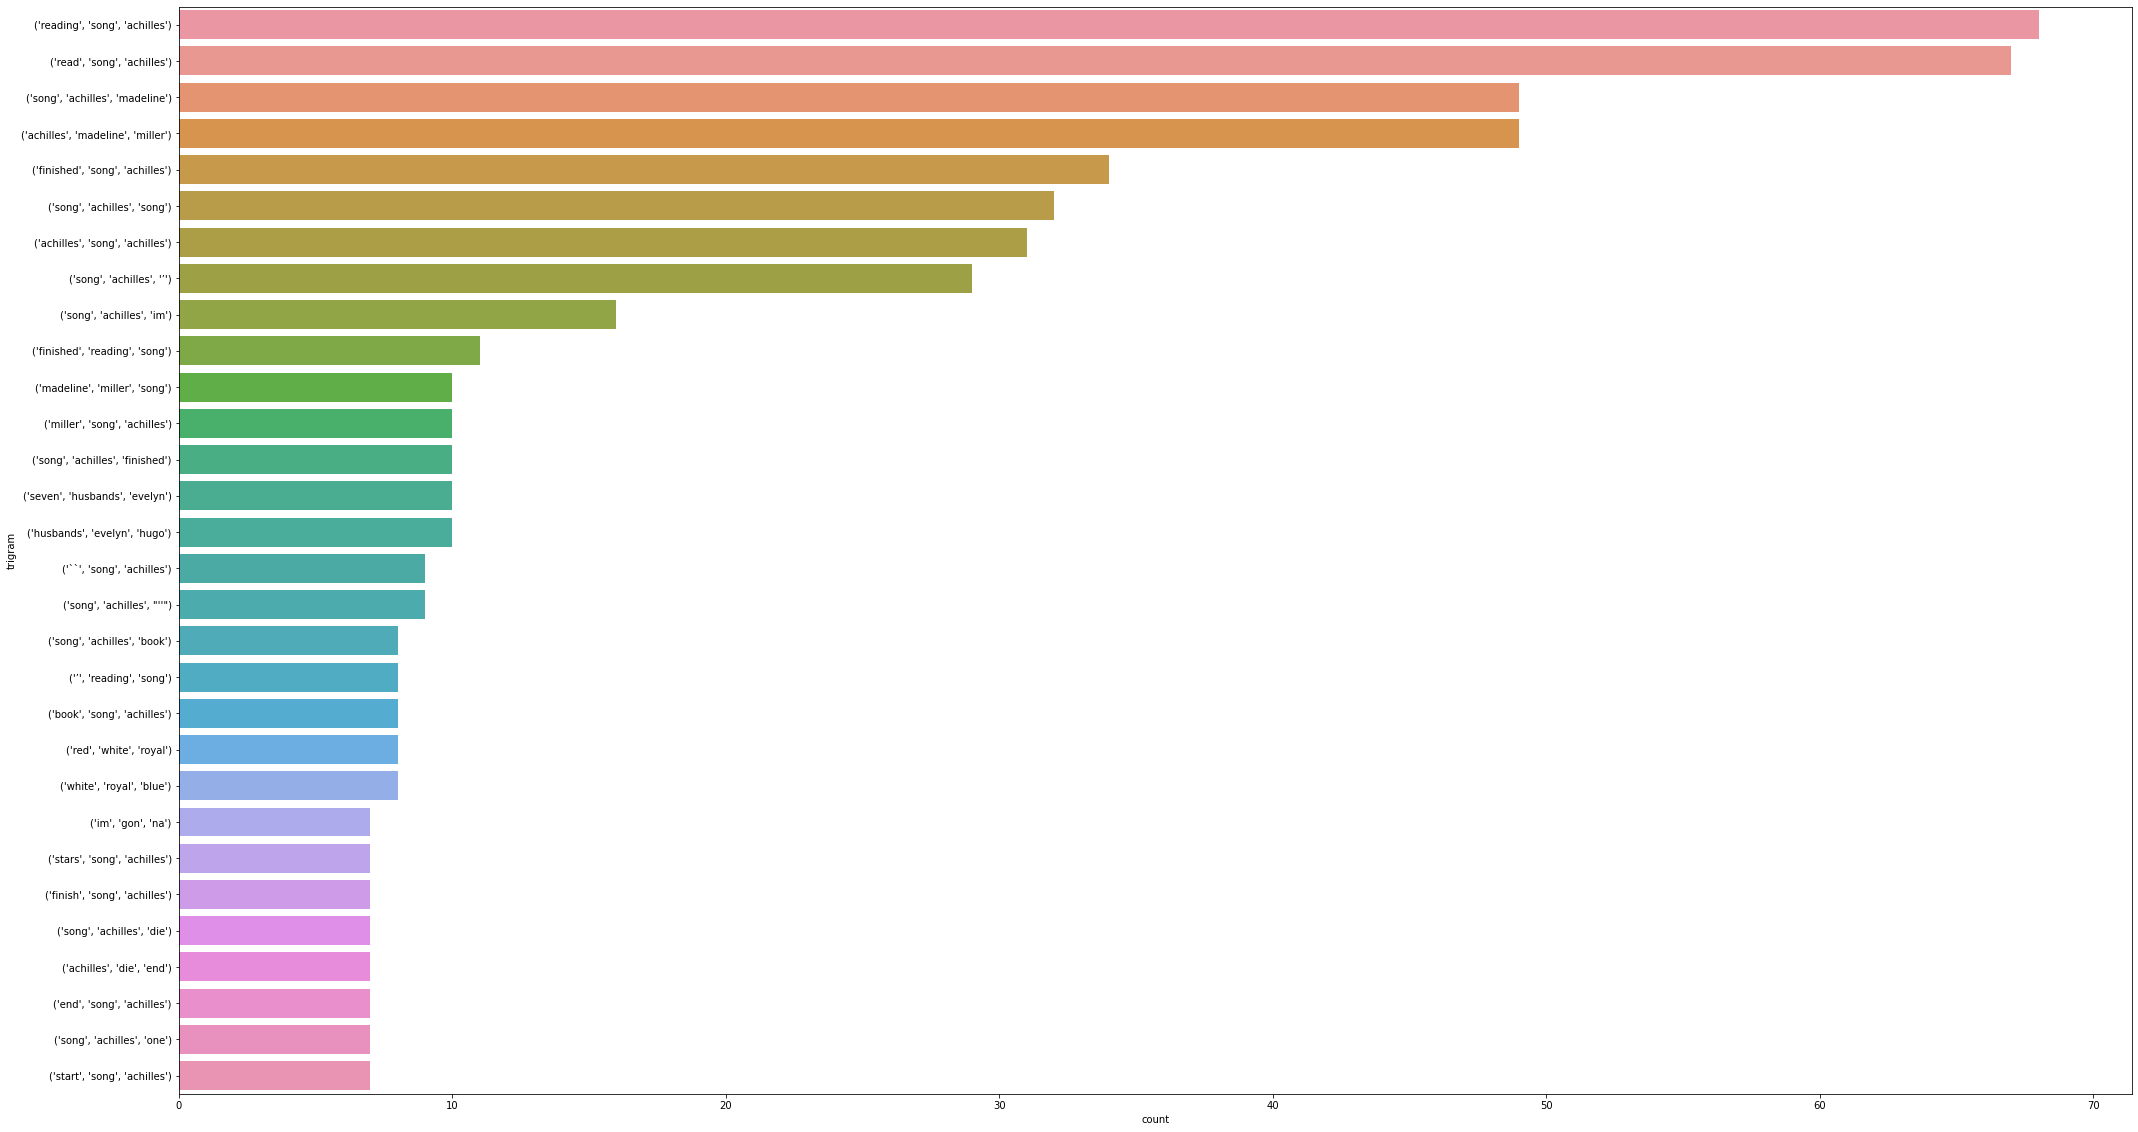

In [80]:
# trigrams visualization
plt.figure(figsize=(35,20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x=df_trigram['count'], y=df_trigram['trigram'])


##### we find less association of words than the trigram, also related to the title, the author or the characters of the book, or the words "read" "reading"

In [81]:
# remove all words that take place in visualisation, bigrams and trigrams
tweet_text = tweet_text.replace("achilles", "")
tweet_text = tweet_text.replace("song", "")
tweet_text = tweet_text.replace("book", "")
tweet_text = tweet_text.replace("read", "")
tweet_text = tweet_text.replace("reading", "")
tweet_text = tweet_text.replace("madeline", "")
tweet_text = tweet_text.replace("miller", "")
tweet_text = tweet_text.replace("ing", "")

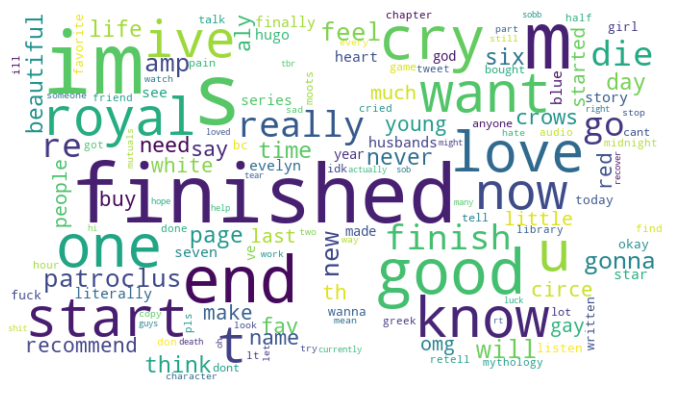

In [56]:
# wordc loud visualization 
def plot_word_cloud(tweet_text, masque) :
    mask_coloring = np.array(Image.open(str(masque)))
    wc = WordCloud(width = 600, height = 600, background_color = "white", max_words = 150,
                   mask = mask_coloring, max_font_size = 90,
                   collocations = False, random_state = 42, margin = 2)

    plt.figure(figsize = (12,8))
    wc.generate(tweet_text)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file('Twitter.jpg')

plot_word_cloud(tweet_text, 'E:\\Logos.png')

##### we find more words which express a return concerning the book like, "love", "good", "recommend", "beautiful"

In [82]:
token = nltk.word_tokenize(tweet_text)
filtered = [word for word in token if word not in stopwords.words('english')]

In [83]:
# creat a list of bigrams and trigrams that found in the of tweets
bigrams = list(ngrams(filtered,2))
trigrams = list(ngrams(filtered,3))

In [84]:
# count Occurency of bigrams and trigrams words in the list of tweets 
a = Counter(bigrams)
b = Counter(trigrams) 

In [85]:
# transform it to DataFram and keep top 30 of bigrams and trigrams
df_bigram = pd.DataFrame.from_records(a.most_common(30), columns=['bigram','count'])
df_trigram = pd.DataFrame.from_records(b.most_common(30), columns=['trigram','count'])

<AxesSubplot:xlabel='count', ylabel='bigram'>

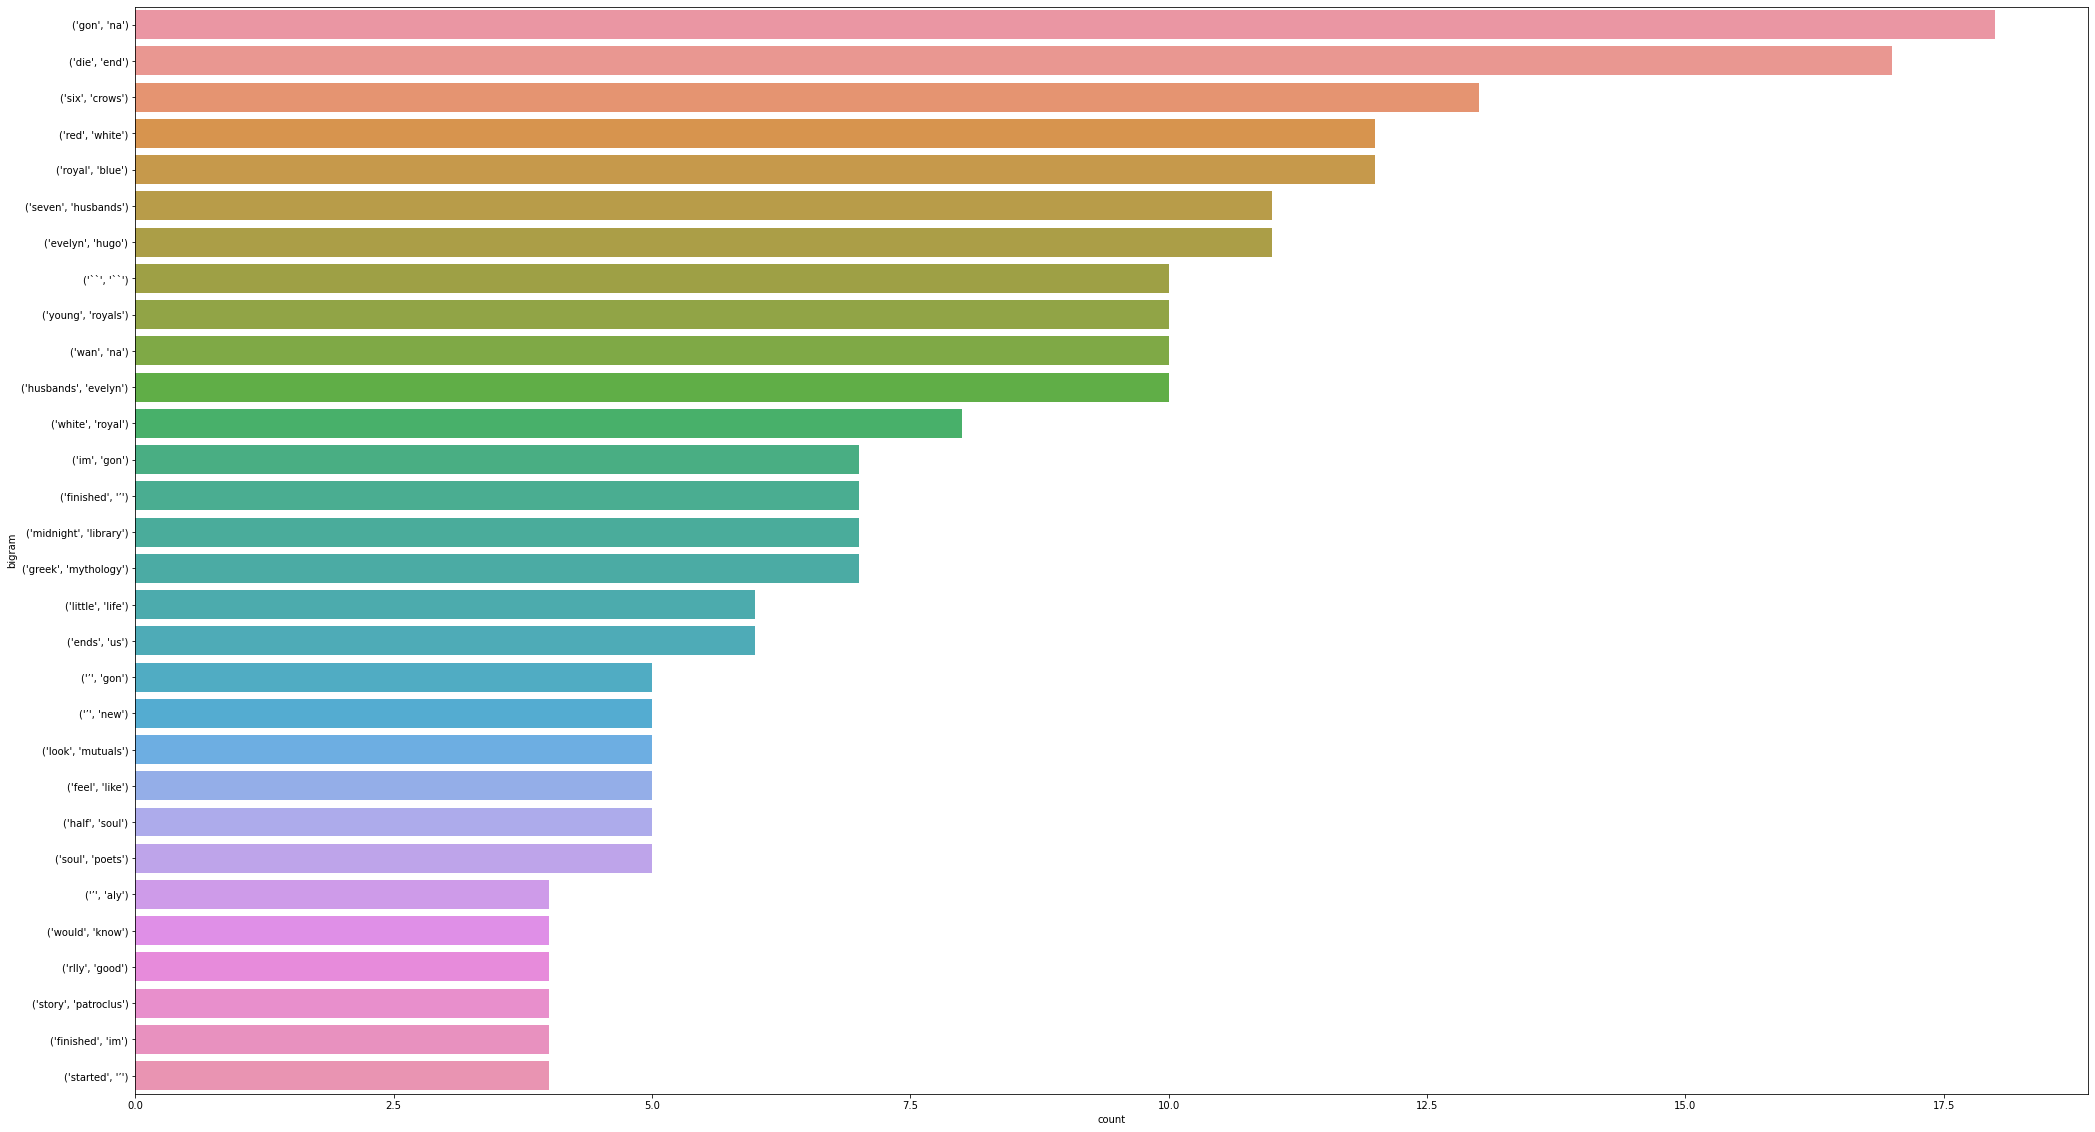

In [87]:
# bigrams visualization 
plt.figure(figsize=(35,20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x=df_bigram['count'], y=df_bigram['bigram'])

#### we find more association than the first bigrams like "really good", "feel like" ....

<AxesSubplot:xlabel='count', ylabel='trigram'>

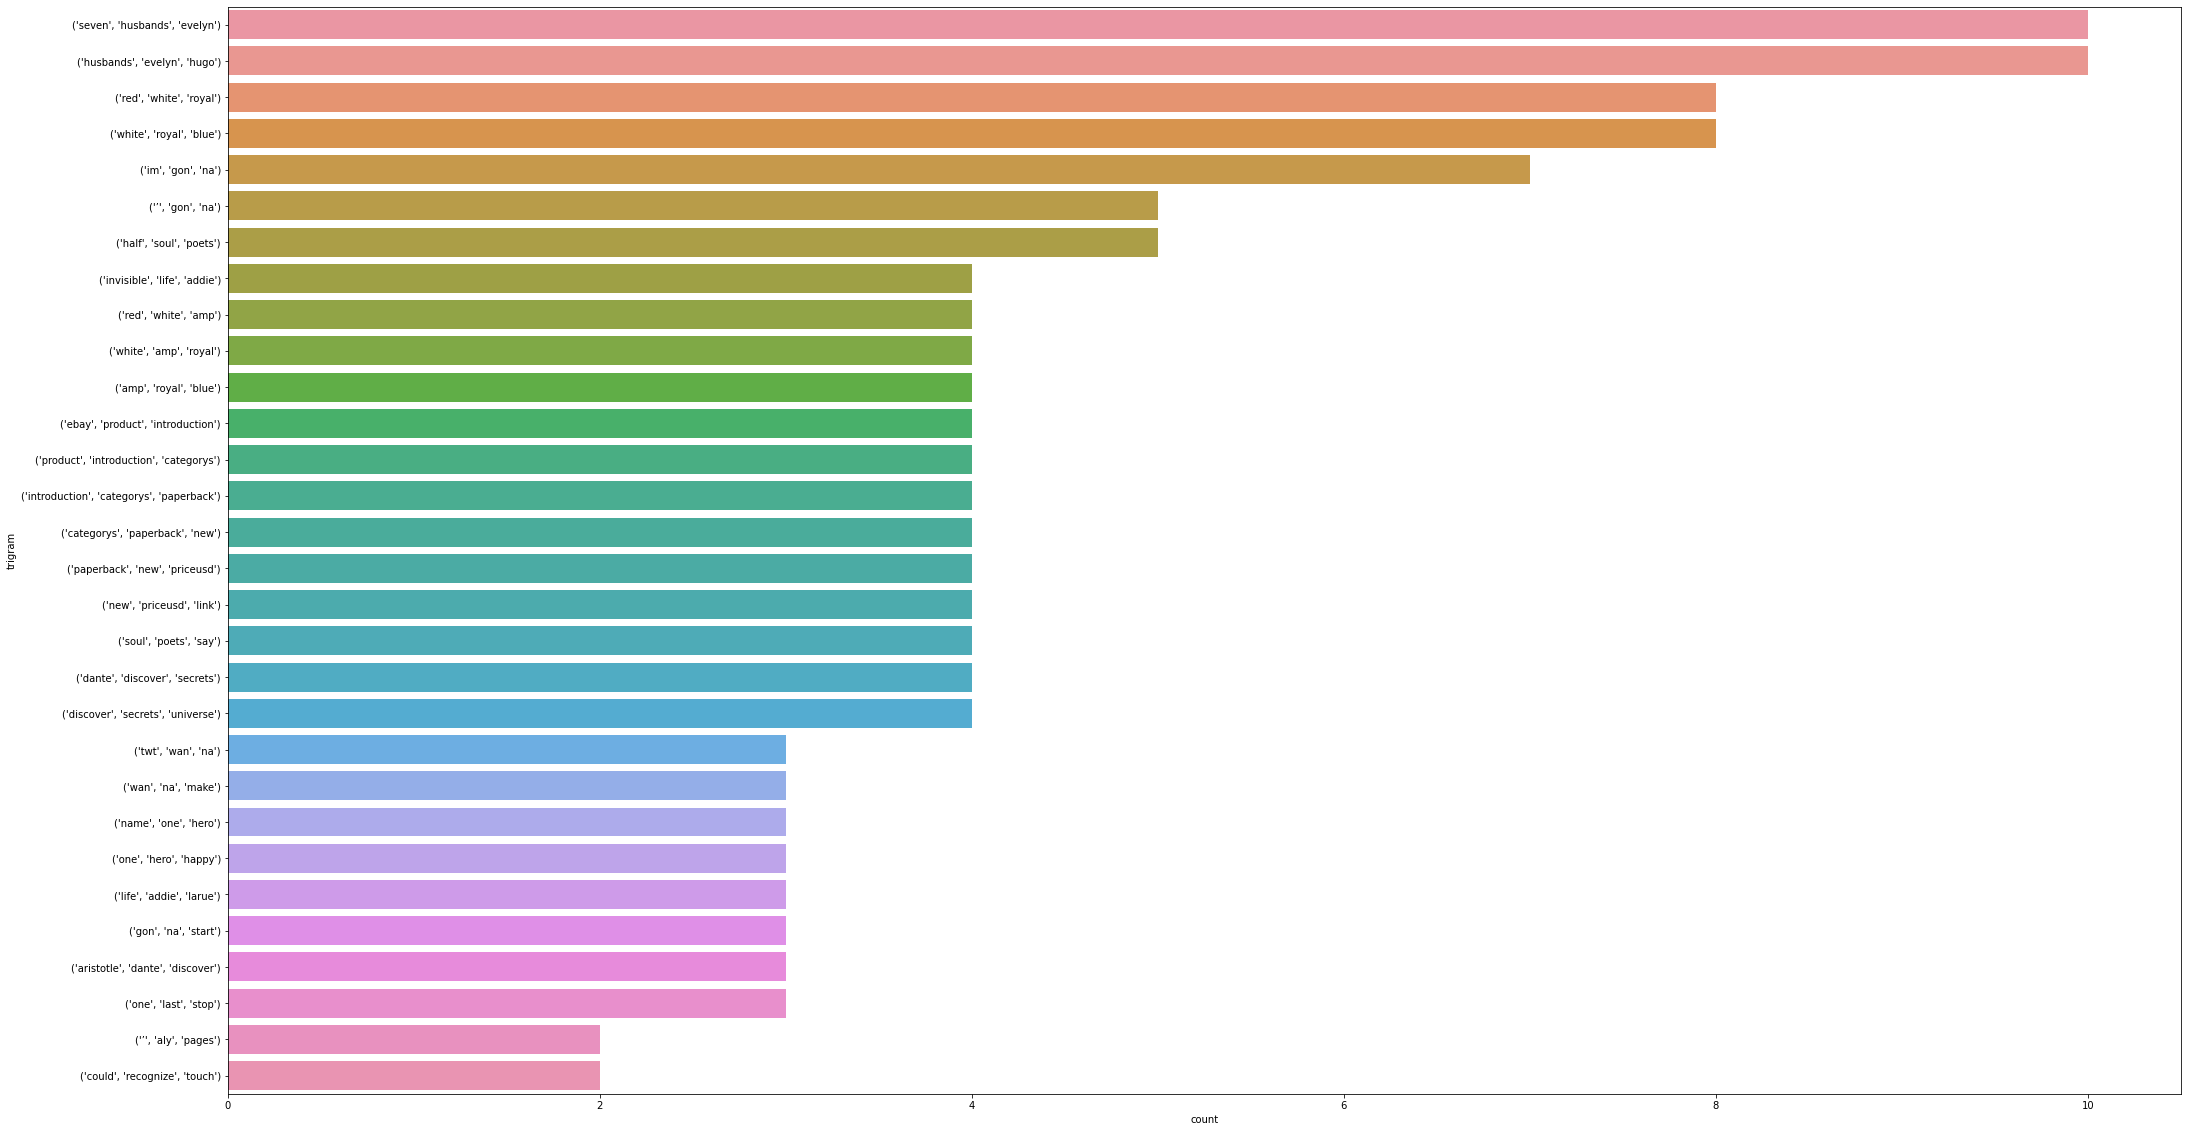

In [88]:
# trigrams visualization
plt.figure(figsize=(35,20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x=df_trigram['count'], y=df_trigram['trigram'])

#### we find more association than the first trigrams like "discover secrets universe", "one hero happy" ....